# Find Largest Events
a. stein 4.11.2023

To-be-done: Identify the largest 5 drought events in the USDM
I suggest the following process:
1. Across all your drought traces, find the one with the largest area in drought (at any time).
2. Remove that entire trace from your search space
3. Repeat 1 and 2 till you have the 5 largest drought events in the record.


In [1]:
import pickle
import numpy as np

import sys
sys.path.append('../../../')
import ndrought.drought_network as dnet
import ndrought.wrangle_v11 as dnw

import matplotlib as mpl
import matplotlib.pyplot as plt

import pandas as pd
import xarray as xr

from tqdm.autonotebook import tqdm

/pool0/data/steinjao/drought/drought_impact/notebooks/explore/drought_track/../../../ndrought/wrangle.py:17: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


## Load in Data

In [2]:
dt_path = '/pool0/home/steinjao/data/drought/drought_impact/data/drought_measures/ndrought_products/CONUS_105W/drought_tracks'

In [3]:
exp_tag = 'f25k_d1_rt20p_paired'

In [4]:
usdm_dtd = dnw.convert_pickle_to_dtd(f'{dt_path}/USDM_tracks_{exp_tag}.pickle')

In [5]:
usdm_dtd = dnw.prune_tracks(usdm_dtd)

In [6]:
spi30d_dtd = dnw.convert_pickle_to_dtd(f'{dt_path}/spi_30d_tracks_{exp_tag}.pickle')

In [7]:
spi30d_dtd = dnw.prune_tracks(spi30d_dtd)

In [8]:
spi180d_dtd = dnw.convert_pickle_to_dtd(f'{dt_path}/spi_180d_tracks_{exp_tag}.pickle')

In [9]:
spi180d_dtd = dnw.prune_tracks(spi180d_dtd)

## Find Largest Events in USDM

In [10]:
test = [1, 5, 3, 2, 7, 2]
i = np.argmax(test)
max_sizes = []
max_locs = []
max_sizes.append(test.pop(i))
max_locs.append(i)
test.insert(i, -1)
print(test)
print(max_sizes)
print(max_locs)

[1, 5, 3, 2, -1, 2]
[7]
[4]


In [11]:
track_maxes = [np.max(track) for track in usdm_dtd['s']]
track_loc_maxes = [np.argmax(track) for track in usdm_dtd['s']]

In [12]:
track_top_max = []
track_top_loc = []
track_internal_top_loc = []

while len(track_top_max) < 5:
    i = np.argmax(track_maxes)
    track_top_max.append(track_maxes.pop(i))
    track_top_loc.append(i)
    track_internal_top_loc.append(track_loc_maxes.pop(i))
    track_maxes.insert(i, -1)
    track_loc_maxes.insert(i, -1)

In [13]:
track_top_max

[146610, 136940, 49498, 33883, 21923]

In [14]:
track_top_loc

[12, 3, 1, 19, 11]

In [15]:
track_internal_top_loc

[555, 155, 15, 14, 10]

In [16]:
track_top_ids = []
track_top_times = []

for loc, loc_internal in zip(track_top_loc, track_internal_top_loc):
    track_top_ids.append(usdm_dtd['id'][loc][loc_internal])
    track_top_times.append(usdm_dtd['t'][loc][loc_internal])

## Load in dnets

In [17]:
dnet_path = '/pool0/home/steinjao/data/drought/drought_impact/data/drought_measures/ndrought_products/CONUS_105W/individual_dnet'

In [18]:
usdm_d1_dnet = dnet.DroughtNetwork.unpickle(f'{dnet_path}/USDM_net_{exp_tag}.pickle')

In [19]:
spi30d_d1_dnet = dnet.DroughtNetwork.unpickle(f'{dnet_path}/spi_30d_net_{exp_tag}.pickle')

In [20]:
spi180d_d1_dnet = dnet.DroughtNetwork.unpickle(f'{dnet_path}/spi_180d_net_{exp_tag}.pickle')

Now they should already be temporally synced ...

In [21]:
[node.time for node in usdm_d1_dnet.nodes][-1]

1148

In [22]:
[node.time for node in spi30d_d1_dnet.nodes][-1]

1148

Perfect. Let's make that quick and easy matching dates dict.

In [23]:
matched_dates = {i:i for i in np.arange(1149)}
matched_dates[1148]

1148

In [24]:
usdm_spi30d_oe = usdm_d1_dnet.find_overlapping_nodes_events(spi30d_d1_dnet, matched_dates)

Overlapping USDM Drought Network & SPI_30D Drought Network:   0%|          | 0/4103268 [00:00<?, ?it/s]

In [25]:
usdm_spi180d_oe = usdm_d1_dnet.find_overlapping_nodes_events(spi180d_d1_dnet, matched_dates)

Overlapping USDM Drought Network & SPI_180D Drought Network:   0%|          | 0/3501020 [00:00<?, ?it/s]

In [26]:
usdm_spi30d_oe

[[{11: [[time: 11, id: 5, time: 11, id: 23]]},
  {12: [[time: 12, id: 6, time: 12, id: 26]]},
  {13: [[time: 13, id: 7, time: 13, id: 28]]},
  {14: [[time: 14, id: 8, time: 14, id: 30]]},
  {15: [[time: 15, id: 9, time: 15, id: 31]]}],
 [{24: [[time: 24, id: 24, time: 24, id: 43]]},
  {25: [[time: 25, id: 26, time: 25, id: 46]]}],
 [{30: [[time: 30, id: 37, time: 30, id: 56]]}],
 [{35: [[time: 35, id: 44, time: 35, id: 61]]},
  {36: [[time: 36, id: 45, time: 36, id: 63],
    [time: 36, id: 45, time: 36, id: 65]]},
  {37: [[time: 37, id: 47, time: 37, id: 67],
    [time: 37, id: 47, time: 37, id: 69]]}],
 [{39: [[time: 39, id: 49, time: 39, id: 76]]},
  {40: [[time: 40, id: 50, time: 40, id: 77]]},
  {41: [[time: 41, id: 52, time: 41, id: 78]]},
  {42: [[time: 42, id: 54, time: 42, id: 83],
    [time: 42, id: 55, time: 42, id: 84]]},
  {43: [[time: 43, id: 56, time: 43, id: 85]]},
  {44: [[time: 44, id: 58, time: 44, id: 87]]},
  {45: [[time: 45, id: 59, time: 45, id: 89]]},
  {46: [[ti

In [27]:
test_thread = usdm_spi30d_oe[0]
test_thread

[{11: [[time: 11, id: 5, time: 11, id: 23]]},
 {12: [[time: 12, id: 6, time: 12, id: 26]]},
 {13: [[time: 13, id: 7, time: 13, id: 28]]},
 {14: [[time: 14, id: 8, time: 14, id: 30]]},
 {15: [[time: 15, id: 9, time: 15, id: 31]]}]

In [28]:
track_top_ids[0]

1790

In [29]:
overlapping_nodes = dict()
found_nodes = [usdm_d1_dnet.nodes[find_id] for find_id in track_top_ids]

for find_id, find_time in zip(track_top_ids, track_top_times):
    found_spi_ids = []
    for thread in usdm_spi30d_oe:
        for event in thread:
            if find_time in event.keys():
                for nodes in event[find_time]:
                    usdm_node, spi_node = nodes
                    if usdm_node.id == find_id:
                        found_spi_ids.append(spi_node)
    overlapping_nodes[find_id] = found_spi_ids

In [30]:
found_nodes

[time: 1125, id: 1790,
 time: 191, id: 229,
 time: 34, id: 43,
 time: 923, id: 1414,
 time: 533, id: 837]

In [31]:
overlapping_nodes

{1790: [time: 1125, id: 2211, time: 1125, id: 2212, time: 1125, id: 2213],
 229: [time: 191, id: 306, time: 191, id: 307, time: 191, id: 308],
 43: [],
 1414: [],
 837: []}

In [32]:
def compute_nodal_overlap_area(node_a, node_b):
    coords_a = node_a.coords
    coord_set_a = set(tuple(coord) for coord in coords_a)

    coords_b = node_b.coords
    coord_set_b = set(tuple(coord) for coord in coords_b)

    coord_set_intersect = coord_set_a.intersection(coord_set_b)

    return len(coord_set_intersect)

In [33]:
overlapping_area = dict()

for node_a in found_nodes:
    overlaps = overlapping_nodes[node_a.id]
    overlap_area = []
    for node_b in overlaps:
        overlap_area.append(compute_nodal_overlap_area(node_a, node_b))
    overlapping_area[node_a.id] = overlap_area

In [34]:
overlapping_area

{1790: [1400, 22720, 1340], 229: [1488, 4172, 734], 43: [], 1414: [], 837: []}

So we got 1790:2212 and 229:307

Let's double check that these actually do overlap

In [35]:
fwd_1790_array = usdm_d1_dnet.to_array(id=1790)

In [36]:
fwd_229_array = usdm_d1_dnet.to_array(id=229)

In [37]:
fwd_2212_array = spi30d_d1_dnet.to_array(id=2212)

In [38]:
fwd_307_array = spi30d_d1_dnet.to_array(id=307)

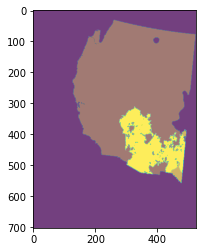

In [39]:
fig, ax = plt.subplots()
i = 0
ax.imshow(fwd_1790_array[i, :, :], alpha=0.5)
ax.imshow(fwd_2212_array[i, :, :], alpha=0.5)

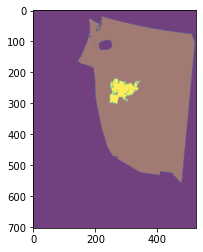

In [40]:
fig, ax = plt.subplots()
i = 0
ax.imshow(fwd_229_array[i, :, :], alpha=0.5)
ax.imshow(fwd_307_array[i, :, :], alpha=0.5)

Okay ... those are "overlapping" ... but like barely, it's just cause USDM is everywhere there

I want to see how much area each are taking up throughout, and how much area do they overlap in

In [41]:
def compute_agreement_area(overlap_events):
    """Computes the alignment fraction, AA.

    Parameters
    ----------
    overlap_events
        Output from find_overlapping_nodes_events.
    
    Returns
    -------
    list[dict]
        Elements within the list are threads, dictionaries
        that map DroughtNetwork time to respective AA values.
    
    """
    net_AA = []

    for thread in tqdm(overlap_events):
        thread_AA = dict()

        for event in thread:
            time = list(event.keys())[0]

            event_a = np.array(event[time])[:, 0]
            coords_a = np.vstack([node.coords for node in event_a])
            coord_set_a = set(tuple(coord) for coord in coords_a)

            event_b = np.array(event[time])[:, 1]
            coords_b = np.vstack([node.coords for node in event_b])
            coord_set_b = set(tuple(coord) for coord in coords_b)

            coord_set_intersect = coord_set_a.intersection(coord_set_b)

            thread_AA[time] = len(coord_set_intersect)
    
        net_AA.append(thread_AA)

    return net_AA

In [42]:
usdm_spi_aa = compute_agreement_area(usdm_spi30d_oe)

  0%|          | 0/101 [00:00<?, ?it/s]

In [43]:
usdm_dnet_array = usdm_d1_dnet.to_array()

In [44]:
spi30d_dnet_array = spi30d_d1_dnet.to_array()

In [45]:
usdm_dnet_array_area = usdm_dnet_array.sum(axis=(1,2))

In [46]:
usdm_dnet_array_area.shape

(1143,)

In [47]:
spi30d_dnet_array_area = spi30d_dnet_array.sum(axis=(1,2))

In [48]:
spi30d_dnet_array_area.shape

(1148,)

In [49]:
usdm_d1_dnet.nodes[0].time

6

In [50]:
spi30d_d1_dnet.nodes[0].time

1

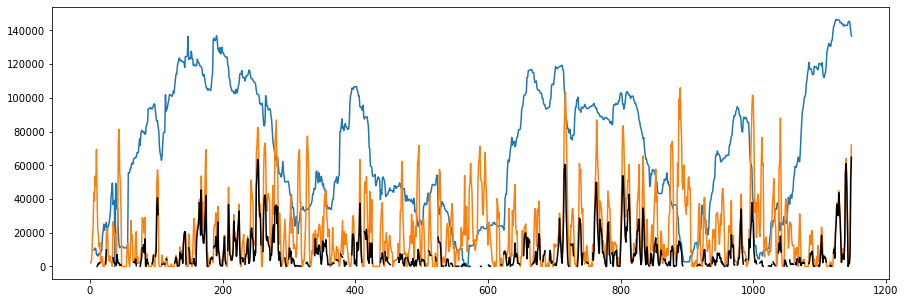

In [51]:
fig, ax = plt.subplots(figsize=(15,5))

ax.plot(np.arange(6, len(usdm_dnet_array_area)+6), usdm_dnet_array_area)
ax.plot(np.arange(1, len(spi30d_dnet_array_area)+1), spi30d_dnet_array_area)

for thread in usdm_spi_aa:
    ax.plot(list(thread.keys()), list(thread.values()), color='k')

In [52]:
usdm_dnet_array.shape

(1143, 702, 525)

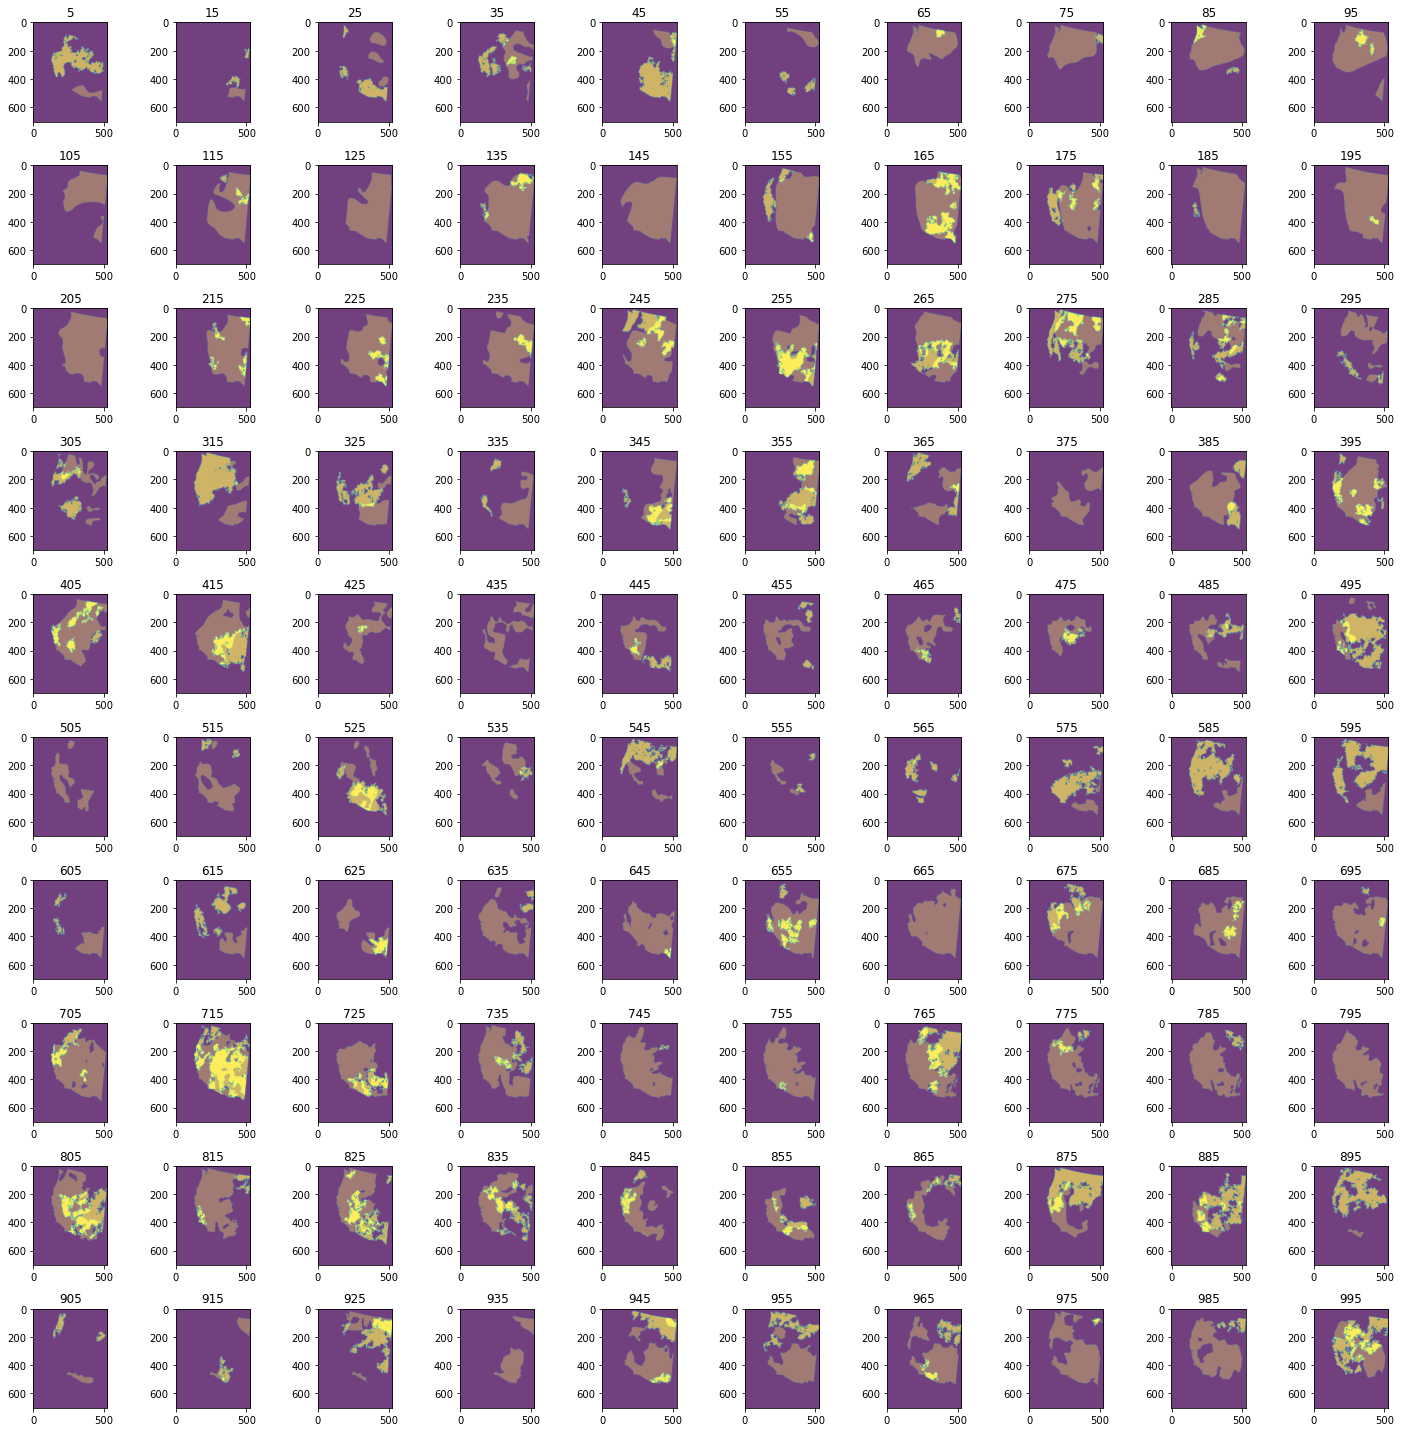

In [53]:
fig, axs = plt.subplots(10,10, figsize=(20,20))

for i, ax in enumerate(axs.ravel()):
    ax.imshow(usdm_dnet_array[i*10, :, :], alpha=0.5) # starts at 6
    ax.imshow(spi30d_dnet_array[i*10+5,:,:], alpha=0.5) # starts at 1
    ax.set_title(i*10+5)

plt.tight_layout()

I'm starting to suspect something is up with my overlapping algorithm

Let's do the same thing above but pairing USDM with itself

In [54]:
usdm_matched_dates_dict = {i:i for i in np.arange(6,1149)}

In [55]:
usdm_self_oe = usdm_d1_dnet.find_overlapping_nodes_events(usdm_d1_dnet, usdm_matched_dates_dict)

Overlapping USDM Drought Network & USDM Drought Network:   0%|          | 0/3290596 [00:00<?, ?it/s]

In [56]:
usdm_self_oe

[[{6: [[time: 6, id: 0, time: 6, id: 0]]},
  {7: [[time: 7, id: 1, time: 7, id: 1]]},
  {8: [[time: 8, id: 2, time: 8, id: 2]]},
  {9: [[time: 9, id: 3, time: 9, id: 3]]},
  {10: [[time: 10, id: 4, time: 10, id: 4]]},
  {11: [[time: 11, id: 5, time: 11, id: 5]]},
  {12: [[time: 12, id: 6, time: 12, id: 6]]},
  {13: [[time: 13, id: 7, time: 13, id: 7]]},
  {14: [[time: 14, id: 8, time: 14, id: 8]]},
  {15: [[time: 15, id: 9, time: 15, id: 9]]},
  {16: [[time: 16, id: 10, time: 16, id: 10]]},
  {17: [[time: 17, id: 11, time: 17, id: 11]]},
  {18: [[time: 18, id: 12, time: 18, id: 12]]},
  {19: [[time: 19, id: 13, time: 19, id: 13],
    [time: 19, id: 14, time: 19, id: 14]]},
  {20: [[time: 20, id: 15, time: 20, id: 15],
    [time: 20, id: 16, time: 20, id: 16]]},
  {21: [[time: 21, id: 17, time: 21, id: 17],
    [time: 21, id: 18, time: 21, id: 18]]},
  {22: [[time: 22, id: 19, time: 22, id: 19],
    [time: 22, id: 20, time: 22, id: 20]]},
  {23: [[time: 23, id: 21, time: 23, id: 21],
  

In [57]:
usdm_usdm_aa = compute_agreement_area(usdm_self_oe)

  0%|          | 0/3 [00:00<?, ?it/s]

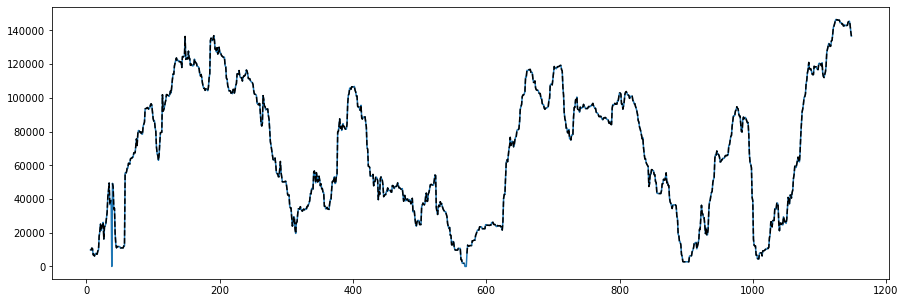

In [58]:
fig, ax = plt.subplots(figsize=(15,5))

ax.plot(np.arange(6, len(usdm_dnet_array_area)+6), usdm_dnet_array_area)

for thread in usdm_usdm_aa:
    ax.plot(list(thread.keys()), list(thread.values()), color='k', linestyle='--')

Aside from that one weird blip, that looks good

Let's get back to what we were doing. We need to crawl down to the origins of the id

Reminder: we got 1790:2212 and 229:307

In [59]:
usdm_adj_dict = usdm_d1_dnet.adj_dict

In [60]:
start_node = usdm_d1_dnet.nodes[1790]
node_ids_to_search = [node.id for node in start_node.past]
node_ids_to_search

[1789]

In [61]:
origin_ids = []
while len(node_ids_to_search) > 0:
    search_id = node_ids_to_search.pop(0)
    search_node = usdm_d1_dnet.nodes[search_id]
    if len(search_node.past) > 0:
        for node in search_node.past:
            node_ids_to_search.append(node.id)
    elif not search_id in origin_ids:
        origin_ids.append(search_id)

In [62]:
origin_ids

[1718,
 1712,
 1692,
 1683,
 1661,
 1637,
 1616,
 1523,
 1458,
 1440,
 1431,
 1249,
 1175,
 1025,
 985,
 918,
 919]

In [63]:
len(origin_ids)

17

In [64]:
for id in origin_ids:
    print(usdm_d1_dnet.nodes[id].past)

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


In [65]:
def find_origins(net, start_id):
    start_node = net.nodes[start_id]
    node_ids_to_search = [node.id for node in start_node.past]

    origin_ids = []
    while len(node_ids_to_search) > 0:
        search_id = node_ids_to_search.pop(0)
        search_node = net.nodes[search_id]
        if len(search_node.past) > 0:
            for node in search_node.past:
                node_ids_to_search.append(node.id)
        elif not search_id in origin_ids:
            origin_ids.append(search_id)

    return origin_ids

In [66]:
usdm_1790_origin_ids = find_origins(usdm_d1_dnet, 1790)

In [67]:
usdm_1790_origin_ids == origin_ids

True

So, so far we have:
1. Finding the node with the largest area
2. Overlap between 2 metrics
3. Find the node that overlaps with the largest area node
4. Trace back the thread to get origin points for overlapping thread

In [70]:
origin_arrays = []

for id in tqdm(usdm_1790_origin_ids):
    origin_arrays.append(usdm_d1_dnet.to_array(id=id))

  0%|          | 0/17 [00:00<?, ?it/s]

In [75]:
start_times = []

for id in usdm_1790_origin_ids:
    start_times.append(usdm_d1_dnet.nodes[id].time)

In [76]:
start_times

[1080,
 1077,
 1066,
 1059,
 1049,
 1041,
 1025,
 969,
 941,
 933,
 930,
 845,
 799,
 651,
 625,
 571,
 571]

In [78]:
for time, array in zip(start_times, origin_arrays):
    print(array.shape[0]+time)

1149
1149
1149
1149
1149
1149
1149
1149
1149
1149
1149
1149
1149
1149
1149
1149
1149
